In [183]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image 
from sklearn.externals.six import StringIO
import pydot
import subprocess

In [184]:
#Loading the csv files into panda dataframes,
#supplying column headers as there were  not present in the file
df = pd.read_csv('adult+stretch.data',names=['color','size','action','age','inflated'])

In [185]:
#getting the size of the dataframe
df.shape

(20, 5)

In [186]:
#just doing some initial analysis, 
#checking the inflation rate
grp_inflated=pd.groupby(df,['inflated'])
grp_inflated.size()

inflated
F    12
T     8
dtype: int64

In [187]:
#Only in case of adults the baloon will be inflated
grp_age_inflated=pd.groupby(df,['age','inflated'])
grp_age_inflated.size()

age    inflated
ADULT  F           4
       T           8
CHILD  F           8
dtype: int64

In [188]:
#As mentioned in the file test condition
#Action STRETCH only can inflate the baloon
grp_action_inflated=pd.groupby(df,['action','inflated'])
grp_action_inflated.size()

action   inflated
DIP      F           8
STRETCH  F           4
         T           8
dtype: int64

In [190]:
#Just tranforming the column inflated to fit the decision tree classifier
#df['inflated'] = df['inflated'].map({ 'T':1,'F':0})
#df['age'] = df['age'].map({ 'ADULT':1,'CHILD':2})
#df['action'] = df['action'].map({ 'STRETCH':1,'DIP':2})
#df['size'] = df['size'].map({ 'LARGE':1,'SMALL':0})
#df['color'] = df['color'].map({ 'YELLOW':1,'PURPLE':0})
#df
df['color'] = df['color'].astype('category')
df['size'] = df['size'].astype('category')
df['action'] = df['action'].astype('category')
df['age'] = df['age'].astype('category')
df['inflated'] = df['inflated'].astype('category')
df

,color,size,action,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,CHILD,F
3,YELLOW,SMALL,DIP,ADULT,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,ADULT,T
7,YELLOW,LARGE,STRETCH,CHILD,F
8,YELLOW,LARGE,DIP,ADULT,F
9,YELLOW,LARGE,DIP,CHILD,F


In [153]:
#Since the dataset is very small ,I'm using a decision tree to explain the data

In [191]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',splitter='random')

In [192]:
#Carving out the response variable and predictors from the dataset

In [193]:
X=df[['color','size','action','age']]

In [194]:
y=df['inflated']

In [195]:
decision_tree_model=decision_tree_model.fit(X,y)

ValueError: could not convert string to float: CHILD

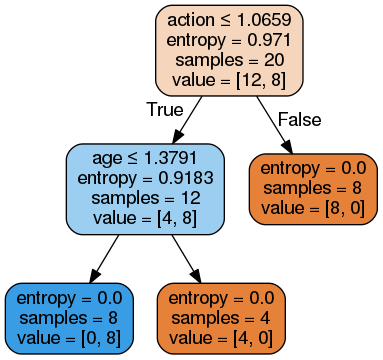

In [177]:
#Visulaizing the Decision tree model
#the tree is written into a file in dot format 
#and is converted into a image file (png) using 'dot' command
#finally the image is displayed in the book using Image function from
#Ipython library

with open("dt.dot", 'w') as f:
        export_graphviz(decision_tree_model, out_file=f,
                        feature_names=['color','size','action','age'],
                        filled=True, rounded=True, 
                         special_characters=True)
cmd = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
subprocess.check_call(cmd)
Image('dt.png')